# Overview

Every single person has been applied to get a loan, lease /finance a car or house/apartment at least once in his/her life and bond investors has to consider credit risk of each applicant. Credit risk which is also known as default risk is the risk that a bond issuer will default on their payments of interest and principal.
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. The goal of this project is to be able to predict the likelihood that an applicant will experience difficulty in repaying their loan.
The two most critical questions in the lending industry are:
- 1) How risky is the borrower? 
- 2) Given the borrower’s risk, should we lend him/her?
Business Objective: Home Credit Default Risk

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. 
Home Credit needs an algorithm that will take as inputs various personal and alternative financial information originally taken from a loan applicant's profile, and then determine a probability of the applicant has at least one late payment when repaying their loan. This probability will be in the range [0.0, 1.0], where 1.0 represents a 100% certainty that the applicant will have at least one delinquent repayment and 0.0 indicates that there is zero chance that the applicant will ever be delinquent. 
The algorithm will be tested on a set of 48,744 individuals who previously borrowed from Home Credit. Home Credit knows which borrowers ultimately paid off their loans, and which ones had one or more late payments. A good algorithm will need to predict a high probability of delinquency for the majority of borrowers who did actually make one or more late payments. This algorithm will also need to predict a low probability of delinquency for the majority of borrowers who eventually did successfully repay their loans with no late payments.

 ## Data

The dataset as it is mentioned above was provided by Home Credit Group's data scientists. It contains a wide variety of personal and financial information belonging to 356,255 individuals who had previously been recipients of loans from Home Credit. These individuals are divided into training and testing sets. The training group contains 307,511 individuals' records. The test group contains 48,744 records.
 The dataset is anonymized, with each individual their loan ID. Any personally identifying, such as name, phone number, or address, has been omitted. Because Home Credit targets the unbanked population, it is unable to rely on traditional measures, such as a credit score, that mainstream financial institutions use when making lending decisions.
 Home Credit works around this obstacle by looking at an extensive and diverse array of personal and financial information for each of its applicants. These features range from common characteristics, such as marital status, age, type of housing, a region of residence, job type, and education level, to some incredible niche characteristics, such as how many elevators are in an applicant's apartment building. 
Home Credit also looks at aspects of applicants' financial backgrounds, including month-by-month payment performance on any loans or credit card balances that the applicant has previously had with Home Credit, as well as the amount and monthly repayment balances of any loans that the applicant may have received from other lenders. All of these features are spread across seven data tables. 
The main data table ('application_train.csv') contains 120 features that comprise applicants' personal background information. The other six data tables contain applicants' previous loan and credit card balance payment histories.  The following diagram provides a brief summary:

![My Title](data.png)


## Workflow
- Collecting data and applying data wrangling 
- Starting exploratory data analysis to find trends and Storytelling
- Conduct further data analysis to identify relationships between different variables
- Dimensionality reduction (PCA) or Feature Selection
- Implement learning algorithms: Random Forest, Multi-layer Perceptron Classier, Logistic Regression Classier, Gaussian Naive Bayes Classier, AdaBoost Classier, Random Forest Classifier, Gradient Boosting Classier
- Model Evaluation and Validation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [2]:
df=pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

In [4]:
df=df.dropna(how='all')
df.shape

(307511, 122)

## Data Wrangling
#### Change columns of object format to interger

In [5]:
df=df[df['CODE_GENDER']!='XNA']
df['NAME_CONTRACT_TYPE']=pd.get_dummies(df['NAME_CONTRACT_TYPE'])['Cash loans']
df['CODE_GENDER']=pd.get_dummies(df['CODE_GENDER'])['F']
df['FLAG_OWN_CAR']=pd.get_dummies(df['FLAG_OWN_CAR'])['Y']
df['FLAG_OWN_REALTY']=pd.get_dummies(df['FLAG_OWN_REALTY'])['Y']
dict1={'Working':0, 'State servant':1, 'Commercial associate':2, 'Pensioner':3,
       'Unemployed':4, 'Student':5, 'Businessman':6, 'Maternity leave':7}
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map(dict1)
dict2={'Secondary / secondary special':0, 'Higher education':1,
       'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4}
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].map(dict2)
dict3={'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3,
       'Separated':4, 'Unknown':5}
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].map(dict3)
dict4={'House / apartment':0, 'Rented apartment':1, 'With parents':2,
       'Municipal apartment':3, 'Office apartment':4, 'Co-op apartment':5}
df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].map(dict4)
dict5={'WEDNESDAY':2, 'MONDAY':0, 'THURSDAY':3, 'SUNDAY':6, 'SATURDAY':5, 'FRIDAY':4,
       'TUESDAY':1}
df['WEEKDAY_APPR_PROCESS_START']=df['WEEKDAY_APPR_PROCESS_START'].map(dict5)
dict6={'Business Entity Type 3':0, 'School':1, 'Government':2, 'Religion':3,
       'Other':4, 'XNA':5, 'Electricity':6, 'Medicine':7,
       'Business Entity Type 2':8, 'Self-employed':9, 'Transport: type 2':10,
       'Construction':11, 'Housing':12, 'Kindergarten':13, 'Trade: type 7':14,
       'Industry: type 11':15, 'Military':16, 'Services':17, 'Security Ministries':18,
       'Transport: type 4':19, 'Industry: type 1':20, 'Emergency':21, 'Security':22,
       'Trade: type 2':23, 'University':24, 'Transport: type 3':25, 'Police':26,
       'Business Entity Type 1':27, 'Postal':28, 'Industry: type 4':29,
       'Agriculture':30, 'Restaurant':31, 'Culture':32, 'Hotel':33,
       'Industry: type 7:':34, 'Trade: type 3':35, 'Industry: type 3':36, 'Bank':37,
       'Industry: type 9':38, 'Insurance':39, 'Trade: type 6':40,
       'Industry: type 2':41, 'Transport: type 1':42, 'Industry: type 12':43,
       'Mobile':57, 'Trade: type 1':44, 'Industry: type 5':45, 'Industry: type 10':46,
       'Legal Services':47, 'Advertising':48, 'Trade: type 5':49, 'Cleaning':50,
       'Industry: type 13':51, 'Trade: type 4':52, 'Telecom':53,
       'Industry: type 8':54, 'Realtor':55, 'Industry: type 6':56}
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].map(dict6)
dict7={'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3,
       'Other_A':4,  'Other_B':5, 'Group of people':6}
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].map(dict7)
dict8={'Laborers':0, 'Core staff':1, 'Accountants':2, 'Managers':3, 
       'Drivers':4, 'Sales staff':5, 'Cleaning staff':6, 'Cooking staff':7,
       'Private service staff':8, 'Medicine staff':9, 'Security staff':10,
       'High skill tech staff':11, 'Waiters/barmen staff':12,
       'Low-skill Laborers':13, 'Realty agents':14, 'Secretaries':15, 'IT staff':16,
       'HR staff':17}
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].map(dict8)
dict9={'reg oper account':0,'org spec account':1,
       'reg oper spec account':2, 'not specified':3}
df['FONDKAPREMONT_MODE']=df['FONDKAPREMONT_MODE'].map(dict9)
dict10={'block of flats':0, 'terraced house':1, 'specific housing':2}
df['HOUSETYPE_MODE']=df['HOUSETYPE_MODE'].map(dict10)
dict11={'Stone, brick':0, 'Block':1,'Panel':2, 'Mixed':3, 'Wooden':4, 'Others':5,
       'Monolithic':6}
df['WALLSMATERIAL_MODE']=df['WALLSMATERIAL_MODE'].map(dict11)
dict12={'No':0, 'Yes':1}
df['EMERGENCYSTATE_MODE']=df['EMERGENCYSTATE_MODE'].map(dict12)

### Percent missing values

In [6]:
desc=df.describe().T
desc['missing %']=1-(desc['count']/len(df))
desc

,count,mean,std,min,25%,50%,75%,max,missing %
SK_ID_CURR,307507.0,278181.527256,102790.132982,100002.00000,189146.500000,278203.00000,367143.500000,4.562550e+05,0.000000
TARGET,307507.0,0.080730,0.272420,0.00000,0.000000,0.00000,0.000000,1.000000e+00,0.000000
NAME_CONTRACT_TYPE,307507.0,0.904799,0.293493,0.00000,1.000000,1.00000,1.000000,1.000000e+00,0.000000
CODE_GENDER,307507.0,0.658352,0.474263,0.00000,0.000000,1.00000,1.000000,1.000000e+00,0.000000
FLAG_OWN_CAR,307507.0,0.340106,0.473745,0.00000,0.000000,0.00000,1.000000,1.000000e+00,0.000000
FLAG_OWN_REALTY,307507.0,0.693669,0.460970,0.00000,0.000000,1.00000,1.000000,1.000000e+00,0.000000
CNT_CHILDREN,307507.0,0.417047,0.722119,0.00000,0.000000,0.00000,1.000000,1.900000e+01,0.000000
AMT_INCOME_TOTAL,307507.0,168797.685779,237124.627320,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08,0.000000
AMT_CREDIT,307507.0,599028.596733,402492.601859,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06,0.000000
AMT_ANNUITY,307495.0,27108.666786,14493.798379,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05,0.000039


In [7]:
desc[desc['missing %']>0.5]['missing %'].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

### Remove the columns with more than 50% missing value

In [8]:
df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],axis=1,inplace=True)

In [9]:
df.shape

(307507, 81)

### Check the Vriance of each column

In [10]:
desc[desc['std']<0.005]['std'].index

Index(['FLAG_MOBIL', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12'], dtype='object')

#### Remove the columns with very small variance

In [11]:
df.drop(['FLAG_MOBIL', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12'],inplace=True,axis=1)

### Correlation with the Target

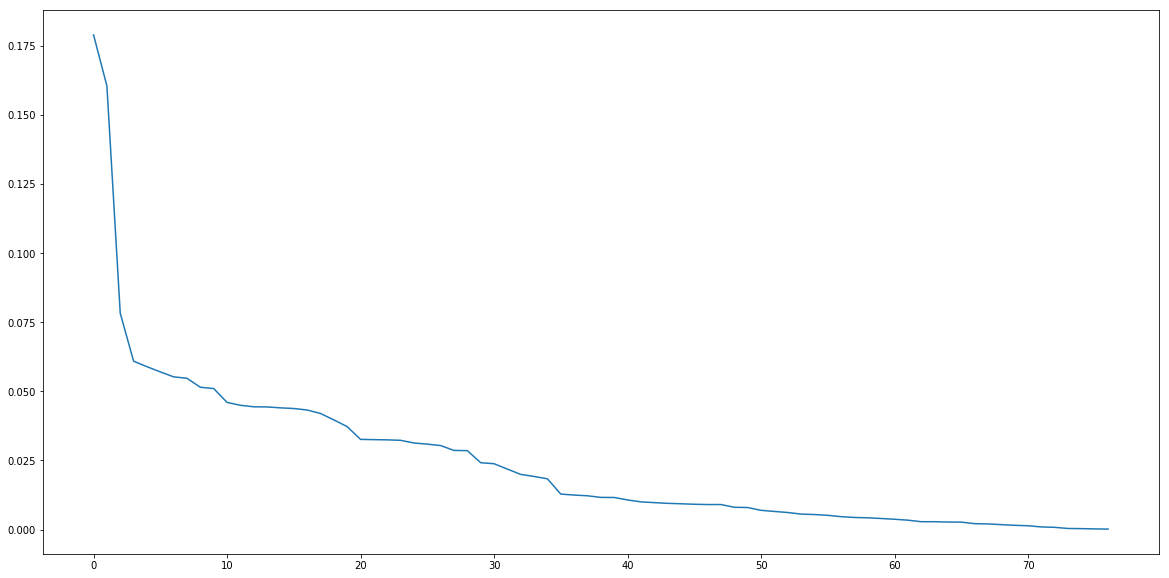

In [12]:
Corr1=abs(df.corr()['TARGET'])

plt.figure(figsize=(20,10))
plt.plot(Corr1.drop('TARGET').sort_values(ascending=False).reset_index()['TARGET'])
plt.show()

#### The elbow point is around 35

In [13]:
Corr1.sort_values(ascending=False)[1:35].index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'NAME_INCOME_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'TOTALAREA_MODE', 'LIVE_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'FLAG_DOCUMENT_6',
       'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN'],
      dtype='object')

#### Pick the most correlated columns with Target

In [14]:
df=df[['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'NAME_INCOME_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'TOTALAREA_MODE', 'LIVE_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'FLAG_DOCUMENT_6',
       'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN']]

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307507.0,0.080730,0.272420,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
EXT_SOURCE_3,246542.0,0.510856,0.194843,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01
EXT_SOURCE_2,306847.0,0.514392,0.191060,8.173617e-08,0.392457,0.565961,0.663617,8.549997e-01
DAYS_BIRTH,307507.0,-16037.027271,4363.982424,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
REGION_RATING_CLIENT_W_CITY,307507.0,2.031518,0.502737,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
REGION_RATING_CLIENT,307507.0,2.052461,0.509034,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
NAME_INCOME_TYPE,307507.0,1.077354,1.210929,0.000000e+00,0.000000,0.000000,2.000000,7.000000e+00
DAYS_LAST_PHONE_CHANGE,307506.0,-962.860546,826.811491,-4.292000e+03,-1570.000000,-757.000000,-274.000000,0.000000e+00
CODE_GENDER,307507.0,0.658352,0.474263,0.000000e+00,0.000000,1.000000,1.000000,1.000000e+00
DAYS_ID_PUBLISH,307507.0,-2994.201670,1509.454566,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


### Outlier detection
#### Checking the columns with outliers (Start with columns with high variance)


In [16]:
df.describe().T['std'].sort_values(ascending=False)

AMT_CREDIT                     402492.601859
AMT_GOODS_PRICE                369447.246462
DAYS_EMPLOYED                  141276.472519
DAYS_BIRTH                       4363.982424
DAYS_REGISTRATION                3522.883030
DAYS_ID_PUBLISH                  1509.454566
DAYS_LAST_PHONE_CHANGE            826.811491
HOUR_APPR_PROCESS_START             3.265835
AMT_REQ_CREDIT_BUREAU_YEAR          1.869286
NAME_INCOME_TYPE                    1.210929
CNT_CHILDREN                        0.722119
NAME_EDUCATION_TYPE                 0.612442
REGION_RATING_CLIENT                0.509034
REGION_RATING_CLIENT_W_CITY         0.502737
CODE_GENDER                         0.474263
FLAG_OWN_CAR                        0.473745
FLAG_DOCUMENT_3                     0.453748
FLAG_PHONE                          0.449516
DEF_30_CNT_SOCIAL_CIRCLE            0.446644
REG_CITY_NOT_WORK_CITY              0.421126
FLAG_WORK_PHONE                     0.399518
FLAG_EMP_PHONE                      0.384282
LIVE_CITY_

#### Checking the outliers and changing the outliers to median 

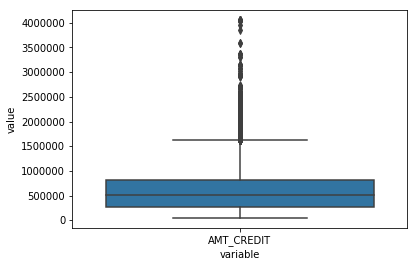

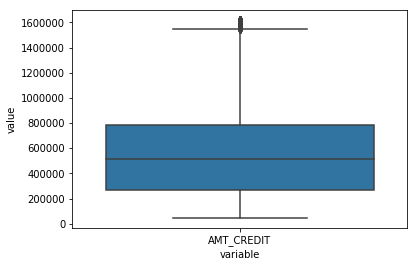

In [17]:
df1 = pd.DataFrame(data = df, columns = ['AMT_CREDIT'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 = df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
MAX=Q3+1.5*IQR
df['AMT_CREDIT']= df['AMT_CREDIT'].mask(df['AMT_CREDIT'] >MAX,df['AMT_CREDIT'].median())

df1 = pd.DataFrame(data = df, columns = ['AMT_CREDIT'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

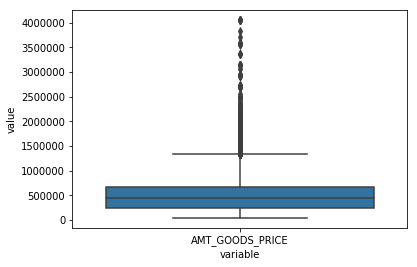

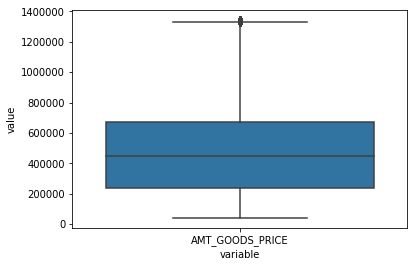

In [18]:
df1 = pd.DataFrame(data = df, columns = ['AMT_GOODS_PRICE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


Q1 = df['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = df['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
MAX=Q3+1.5*IQR
df['AMT_GOODS_PRICE']= df['AMT_GOODS_PRICE'].mask(df['AMT_GOODS_PRICE'] >MAX, df['AMT_GOODS_PRICE'].median())

df1 = pd.DataFrame(data = df, columns = ['AMT_GOODS_PRICE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

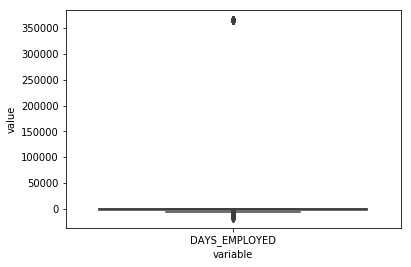

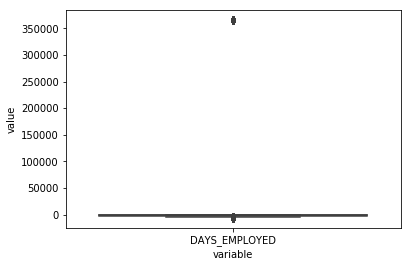

In [19]:
df1 = pd.DataFrame(data = df, columns = ['DAYS_EMPLOYED'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()



Q1 = df['DAYS_EMPLOYED'].quantile(0.25)
Q3 = df['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR

df['DAYS_EMPLOYED']= df['DAYS_EMPLOYED'].mask(df['DAYS_EMPLOYED'] <MIN, df['DAYS_EMPLOYED'].median())

df1 = pd.DataFrame(data = df, columns = ['DAYS_EMPLOYED'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

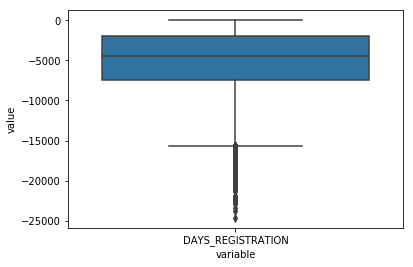

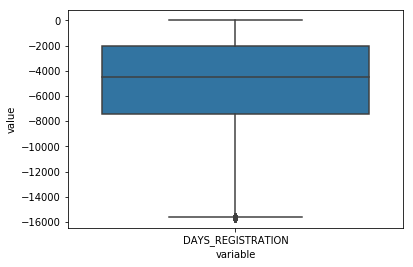

In [20]:
df1 = pd.DataFrame(data = df, columns = ['DAYS_REGISTRATION'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()



Q1 = df['DAYS_REGISTRATION'].quantile(0.25)
Q3 = df['DAYS_REGISTRATION'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
df['DAYS_REGISTRATION']= df['DAYS_REGISTRATION'].mask(df['DAYS_REGISTRATION']<MIN, df['DAYS_REGISTRATION'].median())


df1 = pd.DataFrame(data = df, columns = ['DAYS_REGISTRATION'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


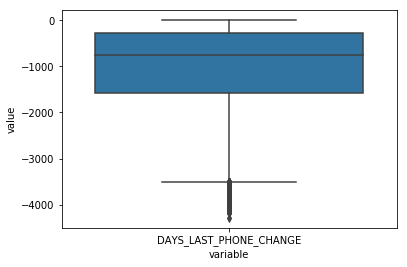

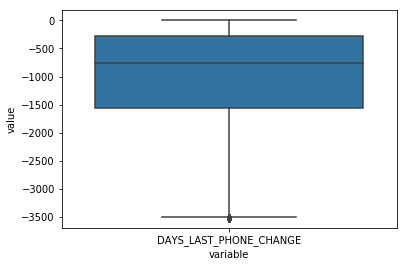

In [21]:
df1 = pd.DataFrame(data = df, columns = ['DAYS_LAST_PHONE_CHANGE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


Q1 = df['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)
Q3 = df['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
df['DAYS_LAST_PHONE_CHANGE']= df['DAYS_LAST_PHONE_CHANGE'].mask(df['DAYS_LAST_PHONE_CHANGE']<MIN, df['DAYS_LAST_PHONE_CHANGE'].median())


df1 = pd.DataFrame(data = df, columns = ['DAYS_LAST_PHONE_CHANGE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

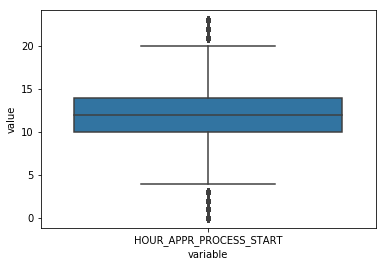

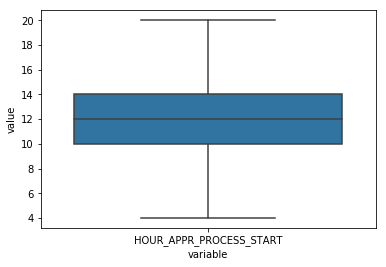

In [22]:
df1 = pd.DataFrame(data = df, columns = ['HOUR_APPR_PROCESS_START'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

Q1 = df['HOUR_APPR_PROCESS_START'].quantile(0.25)
Q3 = df['HOUR_APPR_PROCESS_START'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR
df['HOUR_APPR_PROCESS_START']= df['HOUR_APPR_PROCESS_START'].mask(df['HOUR_APPR_PROCESS_START']<MIN 
                                                                  , df['HOUR_APPR_PROCESS_START'].median())


df['HOUR_APPR_PROCESS_START']= df['HOUR_APPR_PROCESS_START'].mask(df['HOUR_APPR_PROCESS_START']>MAX
                                                                  , df['HOUR_APPR_PROCESS_START'].median())
df1 = pd.DataFrame(data = df, columns = ['HOUR_APPR_PROCESS_START'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

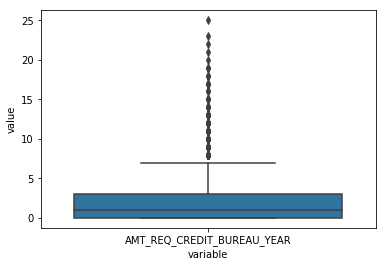

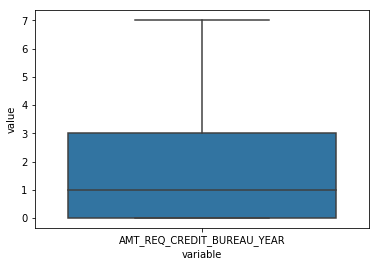

In [23]:
df1 = pd.DataFrame(data = df, columns = ['AMT_REQ_CREDIT_BUREAU_YEAR'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

Q1 = df['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.25)
Q3 = df['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR
df['AMT_REQ_CREDIT_BUREAU_YEAR']= df['AMT_REQ_CREDIT_BUREAU_YEAR'].mask(df['AMT_REQ_CREDIT_BUREAU_YEAR']>MAX
                                                                  , df['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

df1 = pd.DataFrame(data = df, columns = ['AMT_REQ_CREDIT_BUREAU_YEAR'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

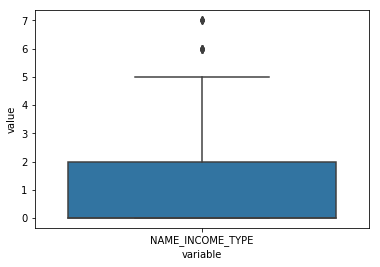

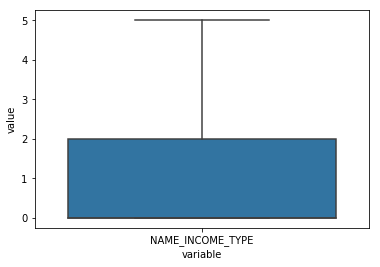

In [24]:
df1 = pd.DataFrame(data = df, columns = ['NAME_INCOME_TYPE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

df['NAME_INCOME_TYPE']= df['NAME_INCOME_TYPE'].mask(df['NAME_INCOME_TYPE']>5
                                                                  , df['NAME_INCOME_TYPE'].median())

df1 = pd.DataFrame(data = df, columns = ['NAME_INCOME_TYPE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

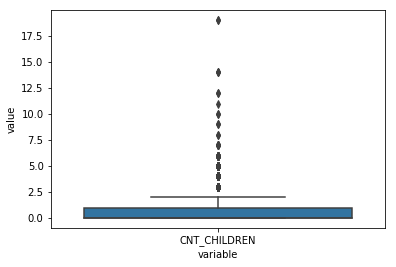

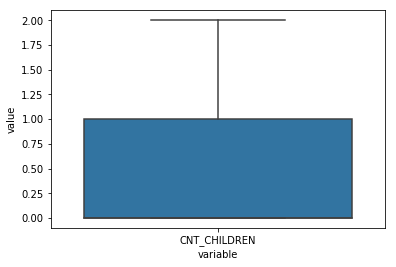

In [25]:
df1 = pd.DataFrame(data = df, columns = ['CNT_CHILDREN'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


df['CNT_CHILDREN']= df['CNT_CHILDREN'].mask(df['CNT_CHILDREN']>2.5, df['CNT_CHILDREN'].median())

df1 = pd.DataFrame(data = df, columns =['CNT_CHILDREN'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

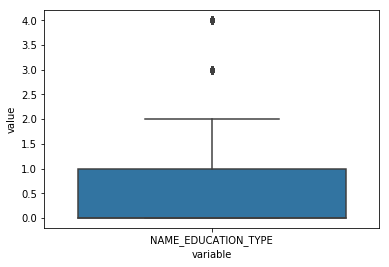

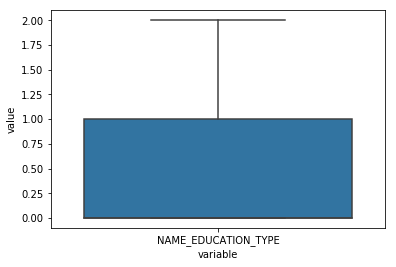

In [26]:
df1 = pd.DataFrame(data = df, columns = ['NAME_EDUCATION_TYPE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


df['NAME_EDUCATION_TYPE']= df['NAME_EDUCATION_TYPE'].mask(df['NAME_EDUCATION_TYPE']>2, df['NAME_EDUCATION_TYPE'].median())

df1 = pd.DataFrame(data = df, columns =['NAME_EDUCATION_TYPE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

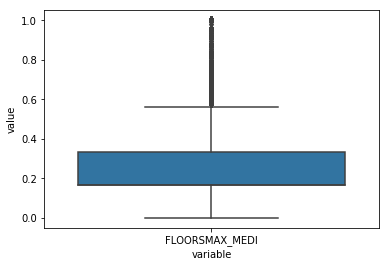

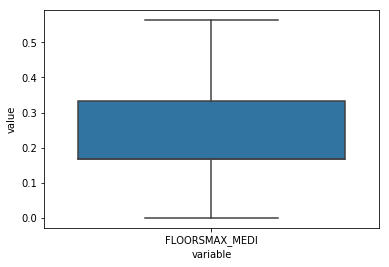

In [27]:
df1 = pd.DataFrame(data = df, columns = ['FLOORSMAX_MEDI'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()
Q1 = df['FLOORSMAX_MEDI'].quantile(0.25)
Q3 = df['FLOORSMAX_MEDI'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR

df['FLOORSMAX_MEDI']= df['FLOORSMAX_MEDI'].mask(df['FLOORSMAX_MEDI']>MAX, df['FLOORSMAX_MEDI'].median())

df1 = pd.DataFrame(data = df, columns =['FLOORSMAX_MEDI'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

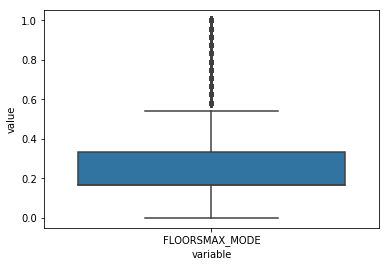

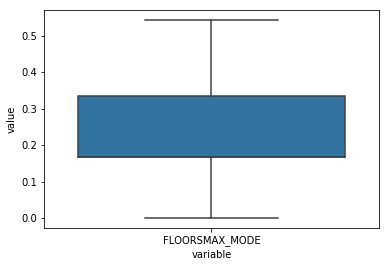

In [28]:
df1 = pd.DataFrame(data = df, columns = ['FLOORSMAX_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()
Q1 = df['FLOORSMAX_MODE'].quantile(0.25)
Q3 = df['FLOORSMAX_MODE'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR

df['FLOORSMAX_MODE']= df['FLOORSMAX_MODE'].mask(df['FLOORSMAX_MODE']>MAX, df['FLOORSMAX_MODE'].median())

df1 = pd.DataFrame(data = df, columns =['FLOORSMAX_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

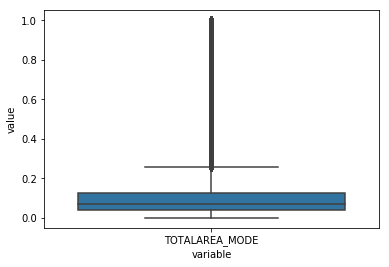

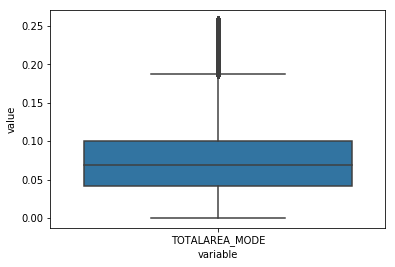

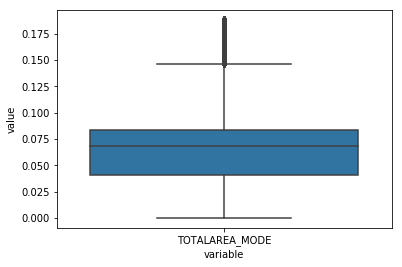

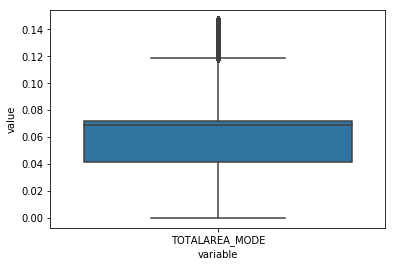

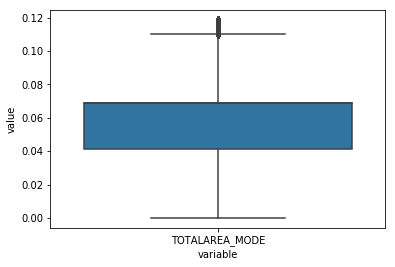

In [29]:
df1 = pd.DataFrame(data = df, columns = ['TOTALAREA_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

Q1 = df['TOTALAREA_MODE'].quantile(0.25)
Q3 = df['TOTALAREA_MODE'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR

df['TOTALAREA_MODE']= df['TOTALAREA_MODE'].mask(df['TOTALAREA_MODE']>MAX, df['TOTALAREA_MODE'].median())

df1 = pd.DataFrame(data = df, columns =['TOTALAREA_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

Q1 = df['TOTALAREA_MODE'].quantile(0.25)
Q3 = df['TOTALAREA_MODE'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR

df['TOTALAREA_MODE']= df['TOTALAREA_MODE'].mask(df['TOTALAREA_MODE']>MAX, df['TOTALAREA_MODE'].median())

df1 = pd.DataFrame(data = df, columns =['TOTALAREA_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


Q1 = df['TOTALAREA_MODE'].quantile(0.25)
Q3 = df['TOTALAREA_MODE'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR

df['TOTALAREA_MODE']= df['TOTALAREA_MODE'].mask(df['TOTALAREA_MODE']>MAX, df['TOTALAREA_MODE'].median())

df1 = pd.DataFrame(data = df, columns =['TOTALAREA_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

Q1 = df['TOTALAREA_MODE'].quantile(0.25)
Q3 = df['TOTALAREA_MODE'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR

df['TOTALAREA_MODE']= df['TOTALAREA_MODE'].mask(df['TOTALAREA_MODE']>MAX, df['TOTALAREA_MODE'].median())

df1 = pd.DataFrame(data = df, columns =['TOTALAREA_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

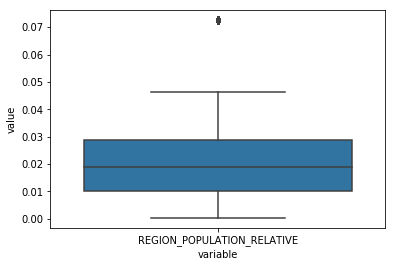

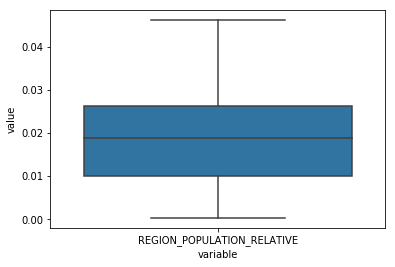

In [30]:
df1 = pd.DataFrame(data = df, columns = ['REGION_POPULATION_RELATIVE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

df['REGION_POPULATION_RELATIVE']= df['REGION_POPULATION_RELATIVE'].mask(df['REGION_POPULATION_RELATIVE']>0.05,
                                                                        df['REGION_POPULATION_RELATIVE'].median())

df1 = pd.DataFrame(data = df, columns =['REGION_POPULATION_RELATIVE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

### EDA
#### Value counts of first four columns

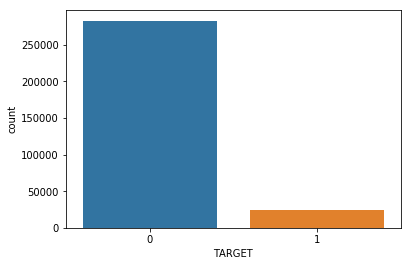

In [31]:
sns.countplot(df['TARGET'])
plt.show()

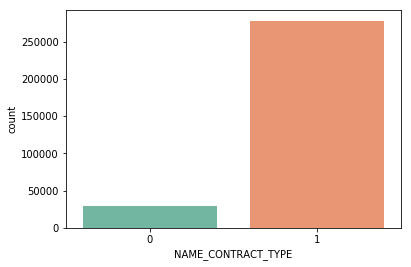

In [32]:
sns.countplot(df['NAME_CONTRACT_TYPE'],palette="Set2")
plt.show()

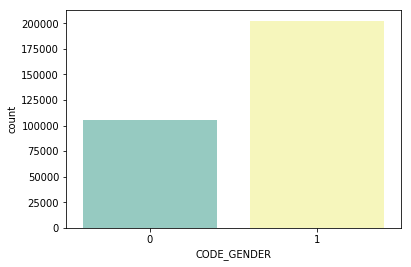

In [33]:
sns.countplot(df['CODE_GENDER'],palette="Set3")
plt.show()

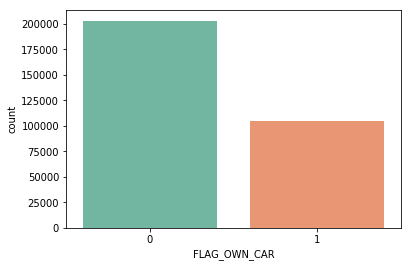

In [34]:
sns.countplot(df['FLAG_OWN_CAR'],palette="Set2")
plt.show()

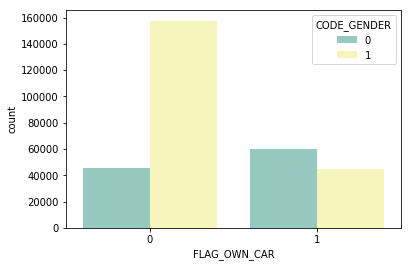

In [35]:
sns.countplot(x='FLAG_OWN_CAR', data=df, hue='CODE_GENDER',palette="Set3")
plt.show()

In [36]:
df['CNT_CHILDREN'].value_counts()

0    219641
1     61118
2     26748
Name: CNT_CHILDREN, dtype: int64

### Fill NaN values

In [37]:
df.describe().T[['min','max']]

,min,max
TARGET,0.000000e+00,1.000000e+00
EXT_SOURCE_3,5.272652e-04,8.960095e-01
EXT_SOURCE_2,8.173617e-08,8.549997e-01
DAYS_BIRTH,-2.522900e+04,-7.489000e+03
REGION_RATING_CLIENT_W_CITY,1.000000e+00,3.000000e+00
REGION_RATING_CLIENT,1.000000e+00,3.000000e+00
NAME_INCOME_TYPE,0.000000e+00,5.000000e+00
DAYS_LAST_PHONE_CHANGE,-3.514000e+03,0.000000e+00
CODE_GENDER,0.000000e+00,1.000000e+00
DAYS_ID_PUBLISH,-7.197000e+03,0.000000e+00


### Seperate the columns with integer values 
#### Fill NaN values of columns with float values with average, Fill NaN values of columns with integer values with the max value counts

In [38]:
col1=['EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','FLOORSMAX_MEDI',
       'FLOORSMAX_MODE','DAYS_REGISTRATION','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','TOTALAREA_MODE','DEF_30_CNT_SOCIAL_CIRCLE',
      'DEF_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','HOUR_APPR_PROCESS_START','FLOORSMAX_AVG']
col2=['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','NAME_INCOME_TYPE','CODE_GENDER','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY'
      'FLAG_DOCUMENT_3','LIVE_CITY_NOT_WORK_CITY','NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','FLAG_DOCUMENT_6','FLAG_WORK_PHONE',
      'FLAG_PHONE','FLAG_OWN_CAR','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_CHILDREN']

In [39]:
df[col1]=df[col1].fillna(df[col1].mean())

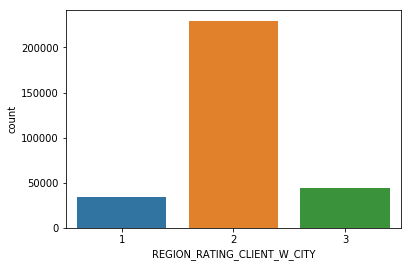

In [40]:
sns.countplot(df['REGION_RATING_CLIENT_W_CITY'])
plt.show()

df['REGION_RATING_CLIENT_W_CITY']=df['REGION_RATING_CLIENT_W_CITY'].fillna(2)

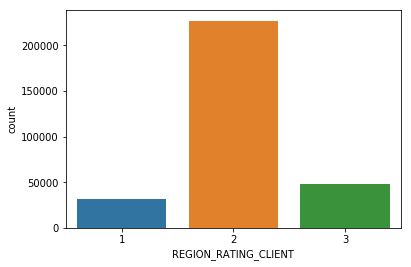

In [41]:
sns.countplot(df['REGION_RATING_CLIENT'])
plt.show()

df['REGION_RATING_CLIENT']=df['REGION_RATING_CLIENT'].fillna(2)

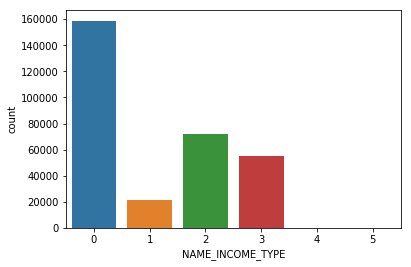

In [42]:
sns.countplot(df['NAME_INCOME_TYPE'])
plt.show()
df['NAME_INCOME_TYPE']=df['NAME_INCOME_TYPE'].fillna(0)

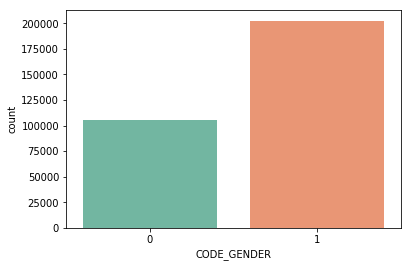

In [43]:
sns.countplot(df['CODE_GENDER'],palette="Set2")
plt.show()
df['NAME_INCOME_TYPE']=df['NAME_INCOME_TYPE'].fillna(1)

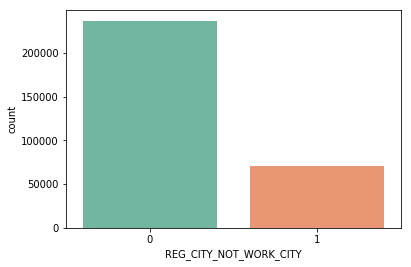

In [44]:
sns.countplot(df['REG_CITY_NOT_WORK_CITY'],palette="Set2")
plt.show()
df['REG_CITY_NOT_WORK_CITY']=df['REG_CITY_NOT_WORK_CITY'].fillna(0)

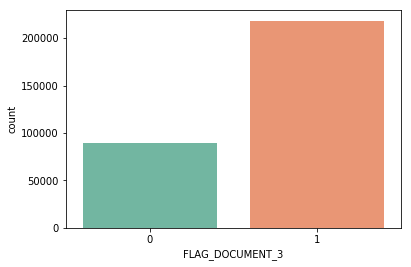

In [45]:
sns.countplot(df['FLAG_DOCUMENT_3'],palette="Set2")
plt.show()
df['FLAG_DOCUMENT_3']=df['FLAG_DOCUMENT_3'].fillna(1)

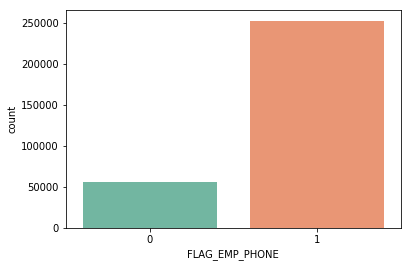

In [46]:
sns.countplot(df['FLAG_EMP_PHONE'],palette="Set2")
plt.show()
df['FLAG_EMP_PHONE']=df['FLAG_EMP_PHONE'].fillna(1)

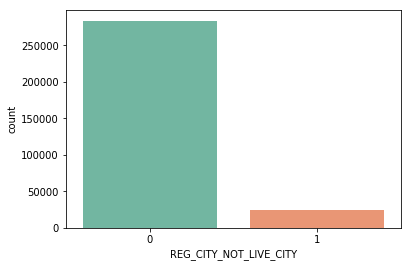

In [47]:
sns.countplot(df['REG_CITY_NOT_LIVE_CITY'],palette="Set2")
plt.show()
df['REG_CITY_NOT_LIVE_CITY']=df['REG_CITY_NOT_LIVE_CITY'].fillna(0)

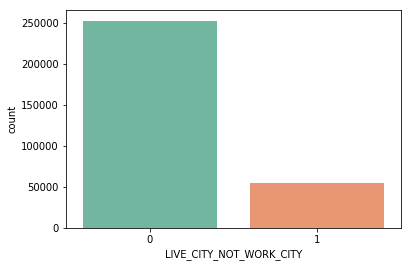

In [48]:
sns.countplot(df['LIVE_CITY_NOT_WORK_CITY'],palette="Set2")
plt.show()
df['LIVE_CITY_NOT_WORK_CITY']=df['LIVE_CITY_NOT_WORK_CITY'].fillna(0)

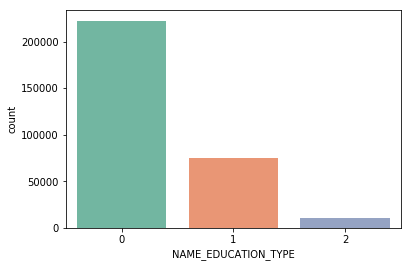

In [49]:
sns.countplot(df['NAME_EDUCATION_TYPE'],palette="Set2")
plt.show()
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].fillna(0)

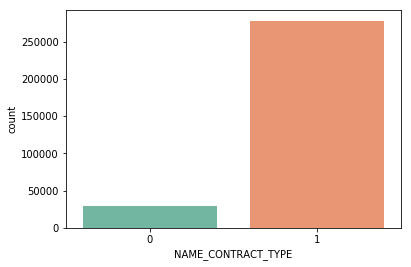

In [50]:
sns.countplot(df['NAME_CONTRACT_TYPE'],palette="Set2")
plt.show()
df['NAME_CONTRACT_TYPE']=df['NAME_CONTRACT_TYPE'].fillna(1)

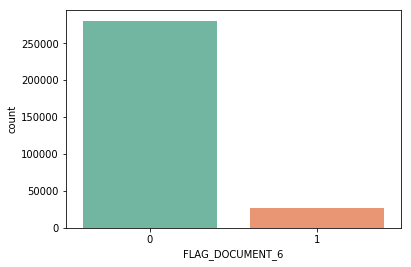

In [51]:
sns.countplot(df['FLAG_DOCUMENT_6'],palette="Set2")
plt.show()
df['FLAG_DOCUMENT_6']=df['FLAG_DOCUMENT_6'].fillna(0)

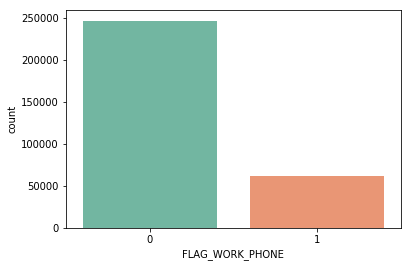

In [52]:
sns.countplot(df['FLAG_WORK_PHONE'],palette="Set2")
plt.show()
df['FLAG_WORK_PHONE']=df['FLAG_WORK_PHONE'].fillna(0)

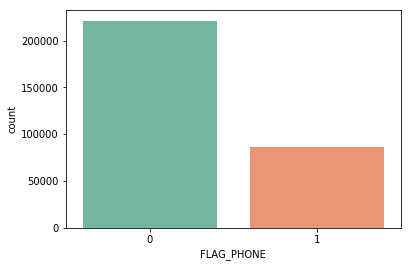

In [53]:
sns.countplot(df['FLAG_PHONE'],palette="Set2")
plt.show()
df['FLAG_PHONE']=df['FLAG_PHONE'].fillna(0)

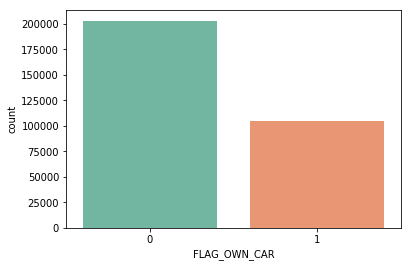

In [54]:
sns.countplot(df['FLAG_OWN_CAR'],palette="Set2")
plt.show()
df['FLAG_OWN_CAR']=df['FLAG_OWN_CAR'].fillna(0)

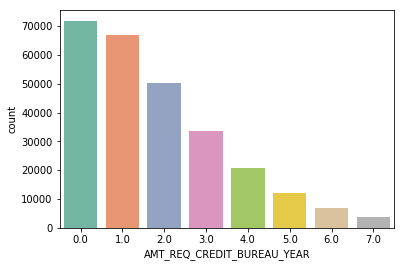

In [55]:
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'],palette="Set2")
plt.show()
df['AMT_REQ_CREDIT_BUREAU_YEAR']=df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

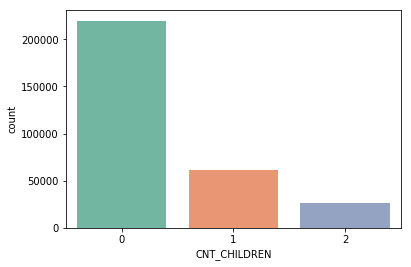

In [56]:
sns.countplot(df['CNT_CHILDREN'],palette="Set2")
plt.show()
df['CNT_CHILDREN']=df['CNT_CHILDREN'].fillna(0)

# Classification


#### Split Train dataset for training process (The X_test, y_test is like a validation step in the whole process.)

In [57]:
Train=df
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

## 1. Logistic Regression

In [58]:
LogReg= LogisticRegression()
# Fit the model on the trainng data.
LogReg.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Test Correct accuracy with Logistic Regression is:', round(LogReg.score(X_test,y_test)*100,4),'%')
print('Train Correct accuracy with Logistic Regression is:', round(LogReg.score(X_train,y_train)*100,4),'%')
#metrics.accuracy_score(y_test, y_pred)
y_pred_prob=LogReg.predict_proba(X_test)[:, 1]
y_pred= LogReg.predict(X_test)
y_train_pred_prob=LogReg.predict_proba(X_train)[:, 1]

Test Correct accuracy with Logistic Regression is: 91.9428 %
Train Correct accuracy with Logistic Regression is: 91.9202 %


### 10-F Cross Validation

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

### Confusion matrix

Table that describes the performance of a classification model

In [59]:
print(metrics.confusion_matrix(y_test, y_pred))

[[84820     0]
 [ 7433     0]]


- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal


**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [60]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [61]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.9194280944793123
0.9194280944793123


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [62]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.08057190552068767
0.08057190552068771


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [63]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.0
0.0


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [64]:
print(TN / float(TN + FP))

1.0


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [65]:
print(FP / float(TN + FP))

0.0


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [66]:
print(TP / np.float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

nan
0.0


C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

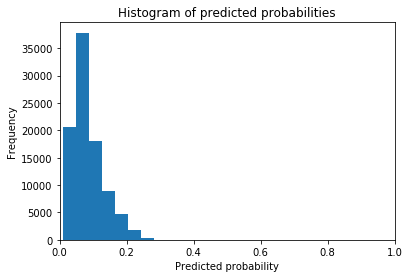

In [67]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

In [68]:
# predict diabetes if the predicted probability is greater than 0.1
from sklearn.preprocessing import binarize
y_pred= binarize([y_pred_prob], 0.1)[0]

# new confusion matrix (threshold of 0.1)
print(metrics.confusion_matrix(y_test, y_pred))

[[61413 23407]
 [ 4341  3092]]


In [69]:
# sensitivity has increased (used to be 0)
print(2645 / (2645+4846))

0.35309037511680685


In [70]:
# specificity has decreased (used to be 1)
print(65770 / (65770+18595))

0.7795886919931251


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

### Compute ROC Curve  and Area Under the Curve (AUC)

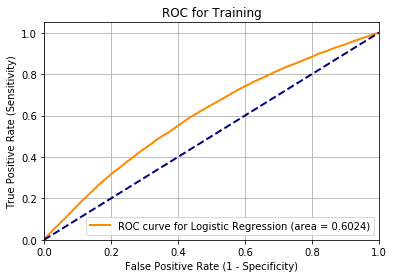

In [71]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Logistic Regression (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

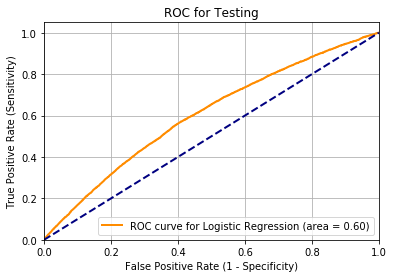

In [72]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Testing')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [73]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [74]:
evaluate_threshold(0.1)

Sensitivity: 0.41598277949683843
Specificity: 0.72420419712332


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [75]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))

0.5700109606043494


#### calculate cross-validated AUC

In [76]:
print('Logistic Regression cross-validated AUC is',cross_val_score(LogReg, X, y, cv=5, scoring='roc_auc').mean())

Logistic Regression cross-validated AUC is 0.6028179160694225


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

## 2. Random Forest

In [77]:
RF= RandomForestClassifier()
RF.fit(X_train, y_train)
print('Test Correct accuracy with Random Forest Classifier is:', round(RF.score(X_test,y_test)*100,4),'%')
print('Train Correct accuracy with Random Forest Classifier is:', round(RF.score(X_train,y_train)*100,4),'%')
y_pred_prob=RF.predict_proba(X_test)[:, 1]
y_pred= RF.predict(X_test)
print(' ')
y_train_pred_prob=RF.predict_proba(X_train)[:, 1]
print('Confustion Matrics:')
print(metrics.confusion_matrix(y_test, y_pred))

print('Recall (Sensetivity):',print(metrics.recall_score(y_test, y_pred)))
print('Precission:',metrics.precision_score(y_test, y_pred))

Test Correct accuracy with Random Forest Classifier is: 91.8561 %
Train Correct accuracy with Random Forest Classifier is: 98.531 %
 
Confustion Matrics:
[[84614   206]
 [ 7307   126]]
0.016951432799677115
Recall (Sensetivity): None
Precission: 0.3795180722891566


#### Histogram of predicted probabilities

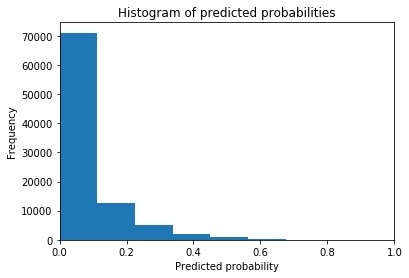

In [78]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

### Compute ROC Curve 

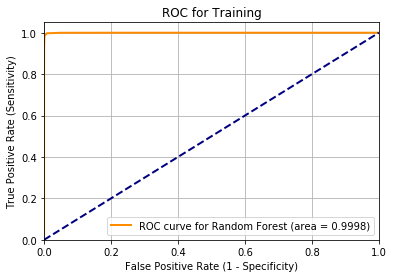

In [79]:

fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Random Forest (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

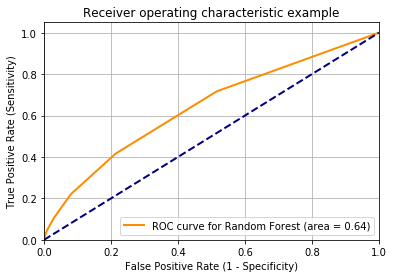

In [80]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### calculate cross-validated AUC

In [81]:
#print('Random Forest cross-validation AUC is',cross_val_score(RF, X, y, cv=5, scoring='roc_auc').mean())

### We have overfitting with Random Forest 

## 3. Gradient Boosting Classifier

In [82]:
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

GB = GradientBoostingClassifier(loss='deviance',
                                learning_rate=0.1,
                                n_estimators=100,
                                subsample=1.0) 
                            
GB.fit(X_train, y_train)
print('Test Correct accuracy with Gradient Boosting Classifier is:', round(GB.score(X_test,y_test)*100,4),'%')
print('Train Correct accuracy with Gradient Boosting Classifier is:', round(GB.score(X_train,y_train)*100,4),'%')

y_pred_prob=GB.predict_proba(X_test)[:, 1]
y_pred= GB.predict(X_test)
print(' ')
y_train_pred_prob=GB.predict_proba(X_train)[:, 1]
print('Confustion Matrics:')
print(metrics.confusion_matrix(y_test, y_pred))

print('Recall (Sensetivity):',print(metrics.recall_score(y_test, y_pred)))
print('Precission:',metrics.precision_score(y_test, y_pred))

Test Correct accuracy with Gradient Boosting Classifier is: 91.9536 %
Train Correct accuracy with Gradient Boosting Classifier is: 91.9727 %
 
Confustion Matrics:
[[84732    88]
 [ 7335    98]]
0.013184447733082201
Recall (Sensetivity): None
Precission: 0.5268817204301075


#### Histogram of predicted probabilities

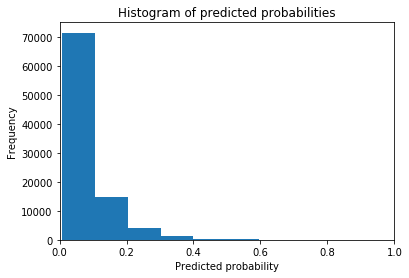

In [83]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

### Compute ROC Curve 

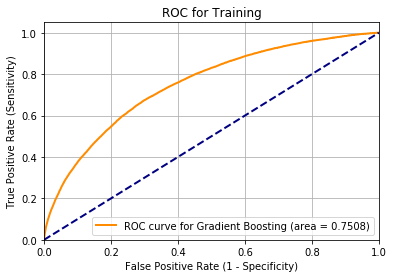

In [84]:

fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

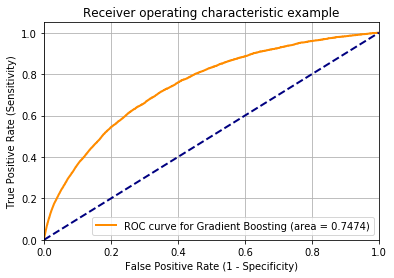

In [85]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Calculate cross-validated AUC

In [86]:
#print('GB cross-validation AUC is',cross_val_score(GB, X, y, cv=5, scoring='roc_auc').mean())

### Gradinet boosting was the best method so far

#### Feature Importance with GB

In [87]:
feature_importance =GB.feature_importances_
#make importances relative to max importance
FeaturesImp=100.0 * (feature_importance / feature_importance.max())
print(FeaturesImp[:20])
print('')
print(np.argsort(FeaturesImp[:20]))

[ 90.03880776 100.          48.2525775   11.68997368   0.53574117
  10.19155622  11.76833042  25.51011231  26.30275622   0.
   0.75118907  28.15137169   7.53986184   7.78035589   3.25597199
   0.           0.35699355  11.7431684   39.3653502    0.45953641]

[ 9 15 16 19  4 10 14 12 13  5  3 17  6  7  8 11 18  2  0  1]


### Gradient Boosting with 20 selected features

In [88]:
X=Train.drop('TARGET',axis=1).iloc[:,list(np.argsort(FeaturesImp[:20]))]
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(X_train, y_train)
print('Traine Correct accuracy with Gradient Boosting Classifier is:', round(GB.score(X_train,y_train)*100,4),'%')
print('Test Correct accuracy with Gradient Boosting Classifier is:', round(GB.score(X_test,y_test)*100,4),'%')

y_pred_prob=GB.predict_proba(X_test)[:, 1]
y_pred= GB.predict(X_test)


print('Confustion Matrics:')
print(metrics.confusion_matrix(y_test, y_pred))

print('Recall (Sensetivity):',print(metrics.recall_score(y_test, y_pred)))
print('Precission:',metrics.precision_score(y_test, y_pred))

Traine Correct accuracy with Gradient Boosting Classifier is: 91.956 %
Test Correct accuracy with Gradient Boosting Classifier is: 91.9471 %
Confustion Matrics:
[[84744    76]
 [ 7353    80]]
0.01076281447598547
Recall (Sensetivity): None
Precission: 0.5128205128205128


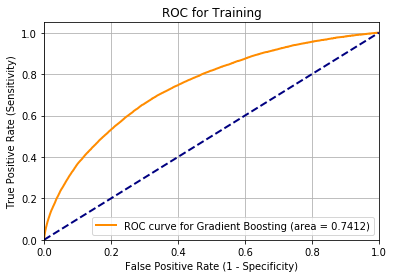

In [90]:
y_train_pred_prob=GB.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

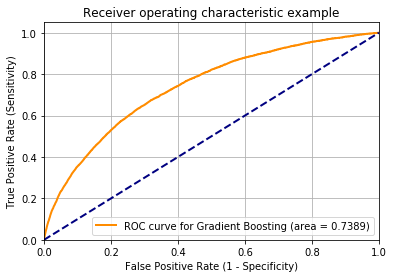

In [91]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 4. Light GBM (Have to work on it)

In [ ]:
import lightgbm as lgb
param = {'num_leaves':31, 'num_trees':100, 'objective':'binary'}
param['metric'] = 'auc'
param['metric'] = ['auc', 'binary_logloss']
num_round = 10
train_data=[X_train,y_train]
test_data=[X_test,y_test]
#bst = lgb.train(param, train_data, num_round)
#ypred = bst.predict(test_data)
#lgb.cv(param, train_data, num_round, nfold=5)

## 5. Adaboost Classifier

In [92]:
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)
AB= AdaBoostClassifier()

AB.fit(X_train, y_train)
print('Test Correct accuracy with AdaBoost Classifier is:', round(AB.score(X_test,y_test)*100,4),'%')
print('Train Correct accuracy with AdaBoost Classifier is:', round(AB.score(X_train,y_train)*100,4),'%')
y_pred_prob=AB.predict_proba(X_test)[:, 1]
y_pred= AB.predict(X_test)
print(' ')


Test Correct accuracy with AdaBoost Classifier is: 91.9569 %
Train Correct accuracy with AdaBoost Classifier is: 91.9295 %
 


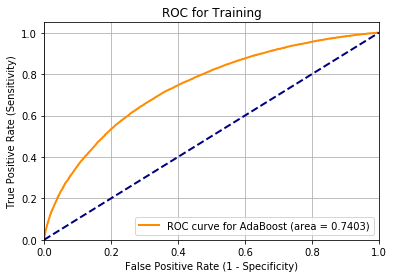

In [93]:
y_train_pred_prob=AB.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

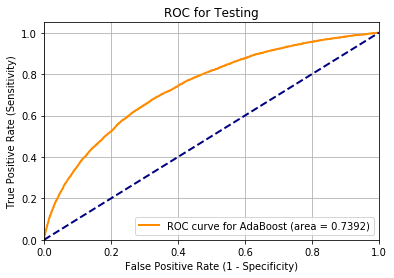

In [94]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Testing')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# calculate cross-validated AUC
#print('Adaboost cross-validation AUC is',cross_val_score(AB, X, y, cv=5, scoring='roc_auc').mean())

In [ ]:
Selecteddf=df

## GB with all Features

In [95]:
df=pd.read_csv('application_train.csv')
df.head()

df=df[df['CODE_GENDER']!='XNA']
df['NAME_CONTRACT_TYPE']=pd.get_dummies(df['NAME_CONTRACT_TYPE'])['Cash loans']
df['CODE_GENDER']=pd.get_dummies(df['CODE_GENDER'])['F']
df['FLAG_OWN_CAR']=pd.get_dummies(df['FLAG_OWN_CAR'])['Y']
df['FLAG_OWN_REALTY']=pd.get_dummies(df['FLAG_OWN_REALTY'])['Y']
dict1={'Working':0, 'State servant':1, 'Commercial associate':2, 'Pensioner':3,
       'Unemployed':4, 'Student':5, 'Businessman':6, 'Maternity leave':7}
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map(dict1)
dict2={'Secondary / secondary special':0, 'Higher education':1,
       'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4}
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].map(dict2)
dict3={'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3,
       'Separated':4, 'Unknown':5}
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].map(dict3)
dict4={'House / apartment':0, 'Rented apartment':1, 'With parents':2,
       'Municipal apartment':3, 'Office apartment':4, 'Co-op apartment':5}
df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].map(dict4)
dict5={'WEDNESDAY':2, 'MONDAY':0, 'THURSDAY':3, 'SUNDAY':6, 'SATURDAY':5, 'FRIDAY':4,
       'TUESDAY':1}
df['WEEKDAY_APPR_PROCESS_START']=df['WEEKDAY_APPR_PROCESS_START'].map(dict5)
dict6={'Business Entity Type 3':0, 'School':1, 'Government':2, 'Religion':3,
       'Other':4, 'XNA':5, 'Electricity':6, 'Medicine':7,
       'Business Entity Type 2':8, 'Self-employed':9, 'Transport: type 2':10,
       'Construction':11, 'Housing':12, 'Kindergarten':13, 'Trade: type 7':14,
       'Industry: type 11':15, 'Military':16, 'Services':17, 'Security Ministries':18,
       'Transport: type 4':19, 'Industry: type 1':20, 'Emergency':21, 'Security':22,
       'Trade: type 2':23, 'University':24, 'Transport: type 3':25, 'Police':26,
       'Business Entity Type 1':27, 'Postal':28, 'Industry: type 4':29,
       'Agriculture':30, 'Restaurant':31, 'Culture':32, 'Hotel':33,
       'Industry: type 7:':34, 'Trade: type 3':35, 'Industry: type 3':36, 'Bank':37,
       'Industry: type 9':38, 'Insurance':39, 'Trade: type 6':40,
       'Industry: type 2':41, 'Transport: type 1':42, 'Industry: type 12':43,
       'Mobile':57, 'Trade: type 1':44, 'Industry: type 5':45, 'Industry: type 10':46,
       'Legal Services':47, 'Advertising':48, 'Trade: type 5':49, 'Cleaning':50,
       'Industry: type 13':51, 'Trade: type 4':52, 'Telecom':53,
       'Industry: type 8':54, 'Realtor':55, 'Industry: type 6':56}
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].map(dict6)
dict7={'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3,
       'Other_A':4,  'Other_B':5, 'Group of people':6}
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].map(dict7)
dict8={'Laborers':0, 'Core staff':1, 'Accountants':2, 'Managers':3, 
       'Drivers':4, 'Sales staff':5, 'Cleaning staff':6, 'Cooking staff':7,
       'Private service staff':8, 'Medicine staff':9, 'Security staff':10,
       'High skill tech staff':11, 'Waiters/barmen staff':12,
       'Low-skill Laborers':13, 'Realty agents':14, 'Secretaries':15, 'IT staff':16,
       'HR staff':17}
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].map(dict8)
dict9={'reg oper account':0,'org spec account':1,
       'reg oper spec account':2, 'not specified':3}
df['FONDKAPREMONT_MODE']=df['FONDKAPREMONT_MODE'].map(dict9)
dict10={'block of flats':0, 'terraced house':1, 'specific housing':2}
df['HOUSETYPE_MODE']=df['HOUSETYPE_MODE'].map(dict10)
dict11={'Stone, brick':0, 'Block':1,'Panel':2, 'Mixed':3, 'Wooden':4, 'Others':5,
       'Monolithic':6}
df['WALLSMATERIAL_MODE']=df['WALLSMATERIAL_MODE'].map(dict11)
dict12={'No':0, 'Yes':1}
df['EMERGENCYSTATE_MODE']=df['EMERGENCYSTATE_MODE'].map(dict12)

In [96]:
df=df.fillna(df.mean())

In [97]:
Train=df
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

GB = GradientBoostingClassifier() 
                            
GB.fit(X_train, y_train)
print('Test Correct accuracy with Gradient Boosting Classifier is:', round(GB.score(X_test,y_test)*100,4),'%')
print('Train Correct accuracy with Gradient Boosting Classifier is:', round(GB.score(X_train,y_train)*100,4),'%')

y_pred_prob=GB.predict_proba(X_test)[:, 1]
y_pred= GB.predict(X_test)
print(' ')

print('Confustion Matrics:')
print(metrics.confusion_matrix(y_test, y_pred))

print('Recall (Sensetivity):',print(metrics.recall_score(y_test, y_pred)))
print('Precission:',metrics.precision_score(y_test, y_pred))

Test Correct accuracy with Gradient Boosting Classifier is: 91.9526 %
Train Correct accuracy with Gradient Boosting Classifier is: 91.9797 %
 
Confustion Matrics:
[[84734    86]
 [ 7338    95]]
0.012780842190232745
Recall (Sensetivity): None
Precission: 0.5248618784530387


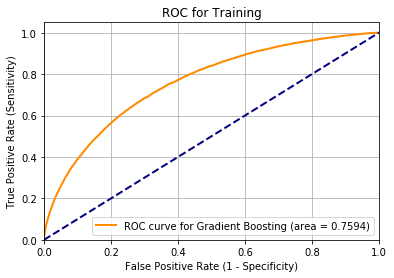

In [98]:
y_train_pred_prob=GB.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

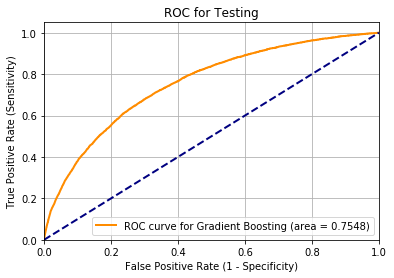

In [99]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Testing')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()